# Linear Regression from Scratch
### with Gradient Descent and Singular Value Decomposition (SVD)

#### by Markus Ullenbruch

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LinearRegression:
    def __init__(self, X, y):
        """ Linear Regression
        
        X -- Design Matrix/ Samples of Features, Samples in rows, Features columnwise
        y -- Target variable to predict
        """
        self.X = X
        self.y = y
        
        self.initialize_weights(self.X.shape[1])
        
    def initialize_weights(self, n_features):
        f = 1 / np.math.sqrt(n_features)
        self.weights = np.random.uniform(-f, f, size=(n_features, 1))
        print('Initial Parameters\n', self.weights)
    
    def fit(self, gradient_descent=True, lr=0.00001, batch_size=200, epochs=100, shuffle=True):
        """ Calculate Model Parameters
        
        gradient_descent=True -- Use Gradient Descent
        gradient_descent=False -- Use Singular Value Decomposition to solve Ax=b
        """
        self.lr = lr
        mse_history, mae_history = [], []
        if shuffle:
            idx = np.arange(self.X.shape[0])
            np.random.shuffle(idx)
            self.X = self.X[idx]
            self.y = self.y[idx]
            
        if not gradient_descent:
            # Singular Value Decomposition (SVD) for solving X*theta = y
            U, S, Vt = np.linalg.svd(self.X, full_matrices=False)
            svd_pseudoinverse = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T
            self.weights = svd_pseudoinverse @ self.y
        else:
            # Gradient Descent
            print('Gradient Descent calculation start..\n')
            for i in range(epochs):
                
                # Learning
                for batch_X, batch_y in self.generator(self.X, self.y, batch_size):
                    pred = self.predict(batch_X)
                    grad = batch_X.T @ (pred-batch_y)
                
                    # Gradient Descent
                    self.update(grad, batch_X.shape[0])
                
                # Calculate Loss
                mse, mae = self.evaluate(self.X, self.y)
                mse_history.append(mse)
                mae_history.append(mae)
                
        
        mse_loss, mae_loss = self.evaluate(self.X, self.y)
        print('Training Results:\nMSE Loss:', mse_loss, '\nMAE Loss:', mae_loss)
        print('Weight Parameter:\n', self.weights)
        return mse_history, mae_history
    
    def update(self, grad, batch_size):
        '''Gradient Descent Step'''
        self.weights -= grad * self.lr / batch_size
        #print(self.weights)
        
    def generator(self, X, y, batch_size):
        
        num_samples = X.shape[0]
        for i in range(0, num_samples, batch_size):
            batch_X = X[i: i+batch_size, :]
            batch_y = y[i: i+batch_size, :]
            yield batch_X, batch_y
    
    def predict(self, X):
        return np.dot(X, self.weights)
    
    def evaluate(self, X, y):
        pred = np.dot(X, self.weights)
        error = pred-y
        mse_loss = np.mean((error)**2)
        mae_loss = np.mean(np.abs(error))
        return mse_loss, mae_loss

In [3]:
class LinearRegression:
    def __init__(self, X, y):
        """ Linear Regression
        
        X -- Design Matrix/ Samples of Features, Samples in rows, Features columnwise
        y -- Target variable to predict
        """
        self.X = X
        self.y = y
        
        self.initialize_weights(self.X.shape[1])
        
    def initialize_weights(self, n_features):
        f = 1 / np.math.sqrt(n_features)
        self.weights = np.random.uniform(-f, f, size=(n_features, 1))
        print('Initial Parameters\n', self.weights)
    
    def fit(self, gradient_descent=True, lr=0.00001, batch_size=200, epochs=100, shuffle=True):
        """ Calculate Model Parameters
        
        gradient_descent=True -- Use Gradient Descent
        gradient_descent=False -- Use Singular Value Decomposition to solve Ax=b
        """
        self.lr = lr
        mse_history, mae_history = [], []
        if shuffle:
            idx = np.arange(self.X.shape[0])
            np.random.shuffle(idx)
            self.X = self.X[idx]
            self.y = self.y[idx]
            
        if not gradient_descent:
            # Singular Value Decomposition (SVD) for solving X*theta = y
            U, S, Vt = np.linalg.svd(self.X, full_matrices=False)
            svd_pseudoinverse = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T
            self.weights = svd_pseudoinverse @ self.y
        else:
            # Gradient Descent
            print('Gradient Descent calculation start..\n')
            for i in range(epochs):
                
                for batch_X, batch_y in self.generator(self.X, self.y, batch_size):
                    gradient = self.calc_gradient(batch_X, batch_y)
                    self.update(gradient)
                
                # Calculate Loss
                mse, mae = self.evaluate(self.X, self.y)
                mse_history.append(mse)
                mae_history.append(mae)
                
        
        mse_loss, mae_loss = self.evaluate(self.X, self.y)
        print('Training Results:\nMSE Loss:', mse_loss, '\nMAE Loss:', mae_loss)
        print('Weight Parameter:\n', self.weights)
        return mse_history, mae_history
    
    def calc_gradient(self, batch_X, batch_y):
        grad = np.zeros_like(batch_X[1])
        for X, y in zip(batch_X, batch_y):
            pred = self.predict(X)
            error = pred - y
            grad += X*error
        grad /= batch_X.shape[0]
        grad = np.expand_dims(grad, axis=1)
        return grad
    
    def generator(self, X, y, batch_size):
        num_samples = X.shape[0]
        for i in range(0, num_samples, batch_size):
            batch_X = X[i: i+batch_size, :]
            batch_y = y[i: i+batch_size, :]
            yield batch_X, batch_y
    
    def update(self, grad):
        '''Gradient Descent Step'''
        self.weights -= grad * self.lr
        #print(self.weights)
        
    
    def predict(self, X):
        return np.dot(X, self.weights)
    
    def evaluate(self, X, y):
        pred = np.dot(X, self.weights)
        error = pred-y
        mse_loss = np.mean((error)**2)
        mae_loss = np.mean(np.abs(error))
        return mse_loss, mae_loss

In [4]:
def add_constant(X):
    """Adding column of Ones to Data Matrix"""
    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones, X))
    return X

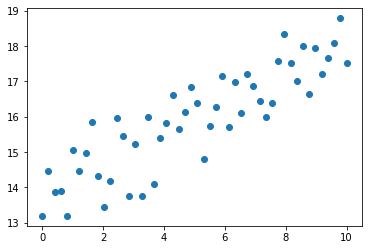

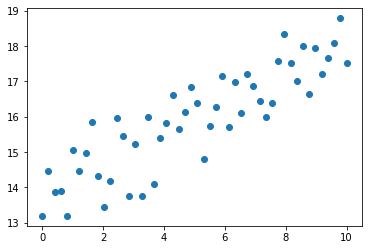

In [5]:
x = np.linspace(0, 10)
y = 0.4*x + np.random.normal(0, 0.8, x.shape) + 14
y = np.expand_dims(y, axis=1)
x = np.expand_dims(x, axis=1)


plt.scatter(x, y)
plt.show()


#x = (x-np.mean(x)) / np.std(x)
#y = (y-np.mean(y)) / np.std(y)

plt.scatter(x, y)
plt.show()

In [6]:
X_batch = add_constant(x) # adding constant

Initial Parameters
 [[ 0.5232405 ]
 [-0.08090261]]
Gradient Descent calculation start..

Training Results:
MSE Loss: 0.5185695342545383 
MAE Loss: 0.5967327029726147
Weight Parameter:
 [[13.76230013]
 [ 0.44807161]]


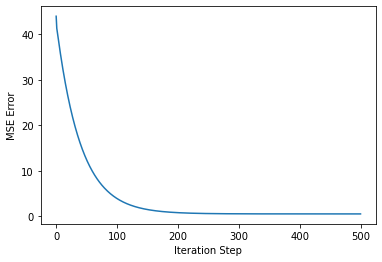

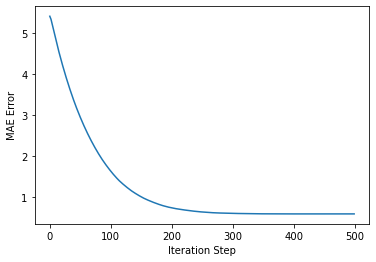

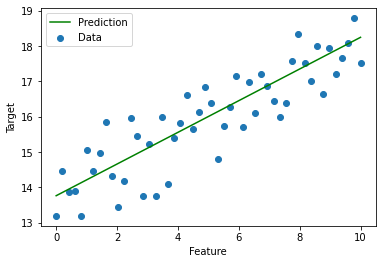

In [7]:
model = LinearRegression(X_batch, y)
mse_hist, mae_hist = model.fit(gradient_descent=True,
                               lr=0.01,
                               epochs=500,
                               batch_size=10,
                              shuffle=True)
pred = model.predict(X_batch)

plt.figure()
plt.plot(mse_hist)
plt.xlabel('Iteration Step')
plt.ylabel('MSE Error')
plt.show()

plt.figure()
plt.plot(mae_hist)
plt.xlabel('Iteration Step')
plt.ylabel('MAE Error')
plt.show()

plt.figure()
plt.scatter(x, y, label='Data')
plt.plot(x, pred, c='g', label='Prediction')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()